# Simple Statistics

## Import Data

In [116]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import io
import plotly.express as px
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [117]:
# Import the csv files that are in the csv folder and save them into dataframes
damallsvenskan2018_df = pd.read_csv('csv/damallsvenskan2018.csv')
damallsvenskan2019_df = pd.read_csv('csv/damallsvenskan2019.csv')
damallsvenskan2020_df = pd.read_csv('csv/damallsvenskan2020.csv')
damallsvenskan2021_df = pd.read_csv('csv/damallsvenskan2021.csv')
damallsvenskan2022_df = pd.read_csv('csv/damallsvenskan2022.csv')
damallsvenskan_all_df = pd.read_csv('csv/damallsvenskan_all.csv')

allsvenskan2018_df = pd.read_csv('csv/allsvenskan2018.csv')
allsvenskan2019_df = pd.read_csv('csv/allsvenskan2019.csv')
allsvenskan2020_df = pd.read_csv('csv/allsvenskan2020.csv')
allsvenskan2021_df = pd.read_csv('csv/allsvenskan2021.csv')
allsvenskan2022_df = pd.read_csv('csv/allsvenskan2022.csv')
allsvenskan_all_df = pd.read_csv('csv/allsvenskan_all.csv')

## Colors


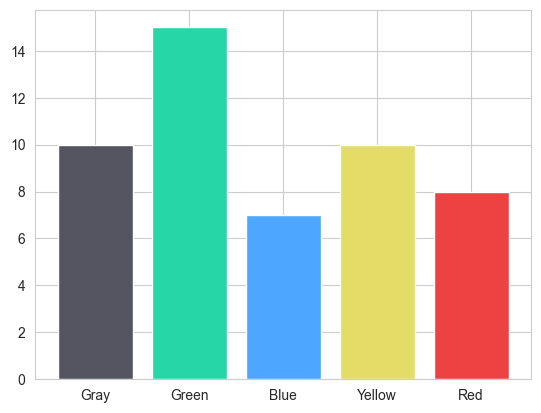

In [118]:
# Hexcolors
Gray = '#545560'
Green = '#27d6a7' # Allsvenskan
Blue = '#4da6ff' # Damallsvenskan
Yellow = '#e3dd68'
Red = '#ed4242'

# Preview colors
data = [10, 15, 7, 10, 8]
colors = [Gray, Green, Blue, Yellow, Red]
labels = ['Gray', 'Green', 'Blue', 'Yellow', 'Red']
plt.bar(labels, data, color=colors)
plt.show()

## Simple Statistics

### Amount of passes

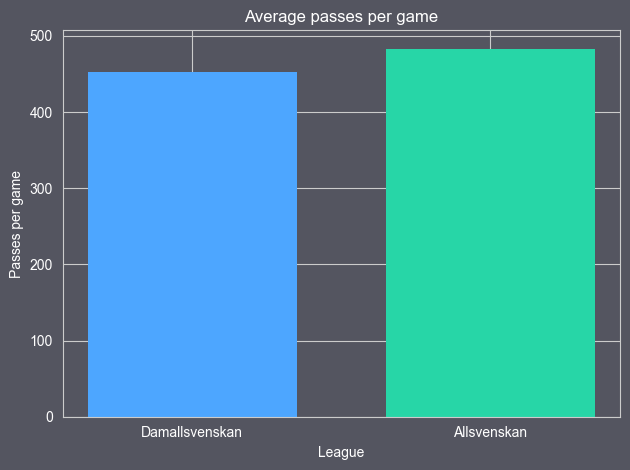

In [119]:
# Count the number of passes in total for all teams for each season
pass_count_damallsvenskan =  damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Pass accurate'].shape[0] + allsvenskan_all_df[allsvenskan_all_df['action'] == 'Pass inaccurate'].shape[0]

# Since the women play less games each season we need to normalize the data by dividing the total number of passes by the number of games played
damallsvenskan_factor = 264 + 264 + 264 + 264 + 364
allsvenskan_factor = 480 + 480 + 480 + 480 + 480
pass_count_damallsvenskan = pass_count_damallsvenskan / damallsvenskan_factor
pass_count_allsvenskan = pass_count_allsvenskan / allsvenskan_factor

# Plot the data
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], pass_count_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], pass_count_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Passes per game', color='white')  # Set the text color for the y-axis label to white
plt.title('Average passes per game', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()

### Passing accuracy

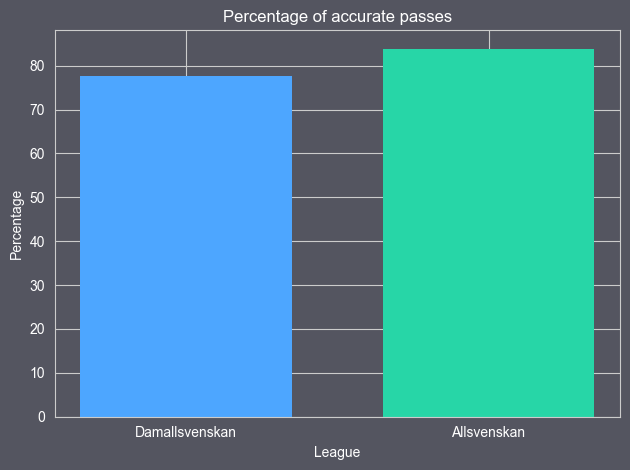

In [120]:
# Count the number of accurate passes and inaccurate passes for all teams for each season

pass_count_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Pass accurate'].shape[0] + allsvenskan_all_df[allsvenskan_all_df['action'] == 'Pass inaccurate'].shape[0]
acc_pass_count_damallsvenskan =  damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Pass accurate'].shape[0]
acc_pass_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Pass accurate'].shape[0]


# Calculate the percentage for each season
percentage_damallsvenskan = acc_pass_count_damallsvenskan / pass_count_damallsvenskan * 100
percentage_allsvenskan = acc_pass_count_allsvenskan / pass_count_allsvenskan * 100

# Plot the data
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], percentage_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], percentage_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Percentage', color='white')  # Set the text color for the y-axis label to white
plt.title('Percentage of accurate passes', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()

### Goal conversion rate

In [121]:
# Count the number of shots in total for all teams for each season
shots_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Shot'].shape[0]
shots_off_target_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Wide shot'].shape[0]
goal_count_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Goal'].shape[0]

shots_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Shot'].shape[0]
shots_off_target_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Wide shot'].shape[0]
goal_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Goal'].shape[0]

# Percentage of shots on target that are goals
shots_on_target_damallsvenskan = (shots_damallsvenskan - shots_off_target_damallsvenskan)
shots_on_target_allsvenskan = (shots_allsvenskan - shots_off_target_allsvenskan)

percentage_goals_damallsvenskan = goal_count_damallsvenskan / shots_on_target_damallsvenskan * 100
percentage_goals_allsvenskan = goal_count_allsvenskan / shots_on_target_allsvenskan * 100

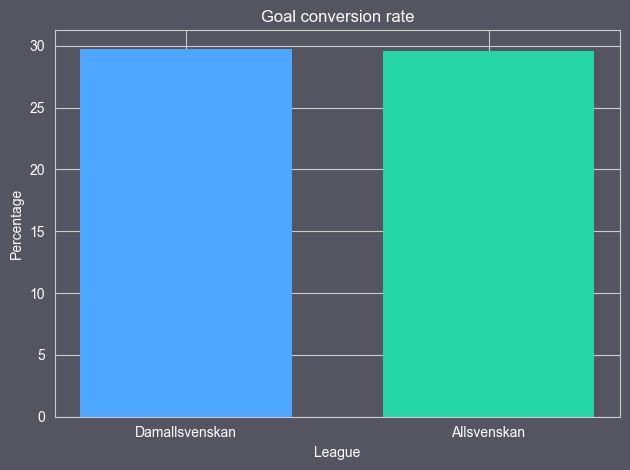

In [122]:
# Plot the data
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], percentage_goals_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], percentage_goals_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Percentage', color='white')  # Set the text color for the y-axis label to white
plt.title('Goal conversion rate', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()

### Goal Placement

#### Damallsvenskan

In [123]:
# For every shot on target, there is a coordinate to where the shot hit the goal.
# I want to count the number of shots that hit the goal in each of the 9 zones of the goal.
# After that i want to calcuate the percentage of the shots for each zone that was a goal.

next_action = damallsvenskan_all_df['action'].shift(-1)
next_goal_mouth = damallsvenskan_all_df['goal_mouth'].shift(-1)
shots_not_goal = (damallsvenskan_all_df['action'] == 'Shot') & (next_action != 'Goal')
shot_placement_counts = damallsvenskan_all_df.loc[shots_not_goal, 'goal_mouth'].value_counts()

placement_to_zone = {
    'Top-Left': 'zone1',
    'Top-Center': 'zone2',
    'Top-Right': 'zone3',
    'Mid-Left': 'zone4',
    'Mid-Center': 'zone5',
    'Mid-Right': 'zone6',
    'Bottom-Left': 'zone7',
    'Bottom-Center': 'zone8',
    'Bottom-Right': 'zone9'
}
shot_placement_dict = {placement_to_zone[k]: v for k, v in shot_placement_counts.items() if k in placement_to_zone}

shots_goal = (damallsvenskan_all_df['action'] == 'Shot') & (next_action == 'Goal')
goal_shot_counts = damallsvenskan_all_df.loc[shots_goal, 'goal_mouth'].value_counts()
goal_shot_placement = {placement_to_zone[k]: v for k, v in goal_shot_counts.items() if k in placement_to_zone}

# Calculate the percentage of goals for each zone
goal_percentage_zone1 = goal_shot_placement['zone1'] / (shot_placement_dict['zone1'] + goal_shot_placement['zone1']) * 100
goal_percentage_zone2 = goal_shot_placement['zone2'] / (shot_placement_dict['zone2'] + goal_shot_placement['zone2']) * 100
goal_percentage_zone3 = goal_shot_placement['zone3'] / (shot_placement_dict['zone3'] + goal_shot_placement['zone3']) * 100
goal_percentage_zone4 = goal_shot_placement['zone4'] / (shot_placement_dict['zone4'] + goal_shot_placement['zone4']) * 100
goal_percentage_zone5 = goal_shot_placement['zone5'] / (shot_placement_dict['zone5'] + goal_shot_placement['zone5']) * 100
goal_percentage_zone6 = goal_shot_placement['zone6'] / (shot_placement_dict['zone6'] + goal_shot_placement['zone6']) * 100
goal_percentage_zone7 = goal_shot_placement['zone7'] / (shot_placement_dict['zone7'] + goal_shot_placement['zone7']) * 100
goal_percentage_zone8 = goal_shot_placement['zone8'] / (shot_placement_dict['zone8'] + goal_shot_placement['zone8']) * 100
goal_percentage_zone9 = goal_shot_placement['zone9'] / (shot_placement_dict['zone9'] + goal_shot_placement['zone9']) * 100

# Data to plot
n_groups = 9
damallsvenskan = (goal_percentage_zone1, goal_percentage_zone2, goal_percentage_zone3, goal_percentage_zone4, goal_percentage_zone5, goal_percentage_zone6, goal_percentage_zone7, goal_percentage_zone8, goal_percentage_zone9)


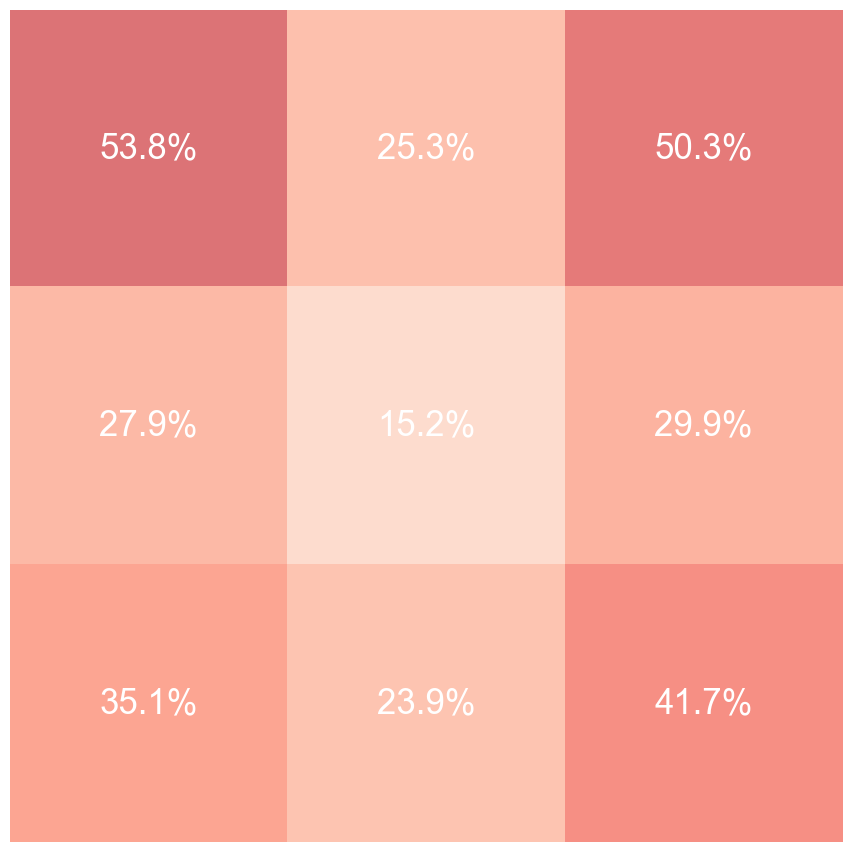

In [124]:
# Load the image of the goal
goal_image_path = 'img/goal.png'
goal_image = Image.open(goal_image_path)
goal_width, goal_height = goal_image.size

# Data
heatmap_data = np.array(damallsvenskan).reshape(3, 3)

# Set up the figure size to match the aspect ratio of the goal image
fig, ax = plt.subplots(figsize=(goal_width/100, goal_height/100), dpi=100)

# Create the heatmap
cax = ax.imshow(heatmap_data, cmap='Reds', interpolation='nearest', alpha=0.6, vmin=0, vmax=70)  # Set the vmin and vmax to define the scale

# Annotate each cell with the numeric value using white text
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        ax.text(j, i, '{:.1f}%'.format(heatmap_data[i, j]), ha='center', va='center', color='w', size = 25)

# Turn off the axes
ax.axis('off')

# Save the heatmap to a temporary buffer
heatmap_buffer = io.BytesIO()
plt.savefig(heatmap_buffer, format='png', transparent=True)
heatmap_buffer.seek(0)

# Load this heatmap into PIL
heatmap_image = Image.open(heatmap_buffer)

# Resize heatmap to match the specified size
heatmap_image = heatmap_image.resize((3123, 681), Image.LANCZOS)

# Define the position where you want to paste the heatmap on the goal image
heatmap_position = (-652, 202) 

# Overlay the heatmap on the goal image
goal_with_heatmap = goal_image.copy()
goal_with_heatmap.paste(heatmap_image, heatmap_position, heatmap_image.split()[3])  # Use the alpha channel as the mask

# Save or display the combined image
goal_with_heatmap_path = 'img/damallsvenskan_heatmap.png'
goal_with_heatmap.save(goal_with_heatmap_path)
goal_with_heatmap.show()


#### Allsvenskan

In [125]:
next_action = allsvenskan_all_df['action'].shift(-1)
next_goal_mouth = allsvenskan_all_df['goal_mouth'].shift(-1)
shots_not_goal = (allsvenskan_all_df['action'] == 'Shot') & (next_action != 'Goal')
shot_placement_counts = allsvenskan_all_df.loc[shots_not_goal, 'goal_mouth'].value_counts()

placement_to_zone = {
    'Top-Left': 'zone1',
    'Top-Center': 'zone2',
    'Top-Right': 'zone3',
    'Mid-Left': 'zone4',
    'Mid-Center': 'zone5',
    'Mid-Right': 'zone6',
    'Bottom-Left': 'zone7',
    'Bottom-Center': 'zone8',
    'Bottom-Right': 'zone9'
}
shot_placement_dict = {placement_to_zone[k]: v for k, v in shot_placement_counts.items() if k in placement_to_zone}

shots_goal = (allsvenskan_all_df['action'] == 'Shot') & (next_action == 'Goal')
goal_shot_counts = allsvenskan_all_df.loc[shots_goal, 'goal_mouth'].value_counts()
goal_shot_placement = {placement_to_zone[k]: v for k, v in goal_shot_counts.items() if k in placement_to_zone}

# Calculate the percentage of goals for each zone
goal_percentage_zone1 = goal_shot_placement['zone1'] / (shot_placement_dict['zone1'] + goal_shot_placement['zone1']) * 100
goal_percentage_zone2 = goal_shot_placement['zone2'] / (shot_placement_dict['zone2'] + goal_shot_placement['zone2']) * 100
goal_percentage_zone3 = goal_shot_placement['zone3'] / (shot_placement_dict['zone3'] + goal_shot_placement['zone3']) * 100
goal_percentage_zone4 = goal_shot_placement['zone4'] / (shot_placement_dict['zone4'] + goal_shot_placement['zone4']) * 100
goal_percentage_zone5 = goal_shot_placement['zone5'] / (shot_placement_dict['zone5'] + goal_shot_placement['zone5']) * 100
goal_percentage_zone6 = goal_shot_placement['zone6'] / (shot_placement_dict['zone6'] + goal_shot_placement['zone6']) * 100
goal_percentage_zone7 = goal_shot_placement['zone7'] / (shot_placement_dict['zone7'] + goal_shot_placement['zone7']) * 100
goal_percentage_zone8 = goal_shot_placement['zone8'] / (shot_placement_dict['zone8'] + goal_shot_placement['zone8']) * 100
goal_percentage_zone9 = goal_shot_placement['zone9'] / (shot_placement_dict['zone9'] + goal_shot_placement['zone9']) * 100

n_groups = 9
allsvenskan = (goal_percentage_zone1, goal_percentage_zone2, goal_percentage_zone3, goal_percentage_zone4, goal_percentage_zone5, goal_percentage_zone6, goal_percentage_zone7, goal_percentage_zone8, goal_percentage_zone9)

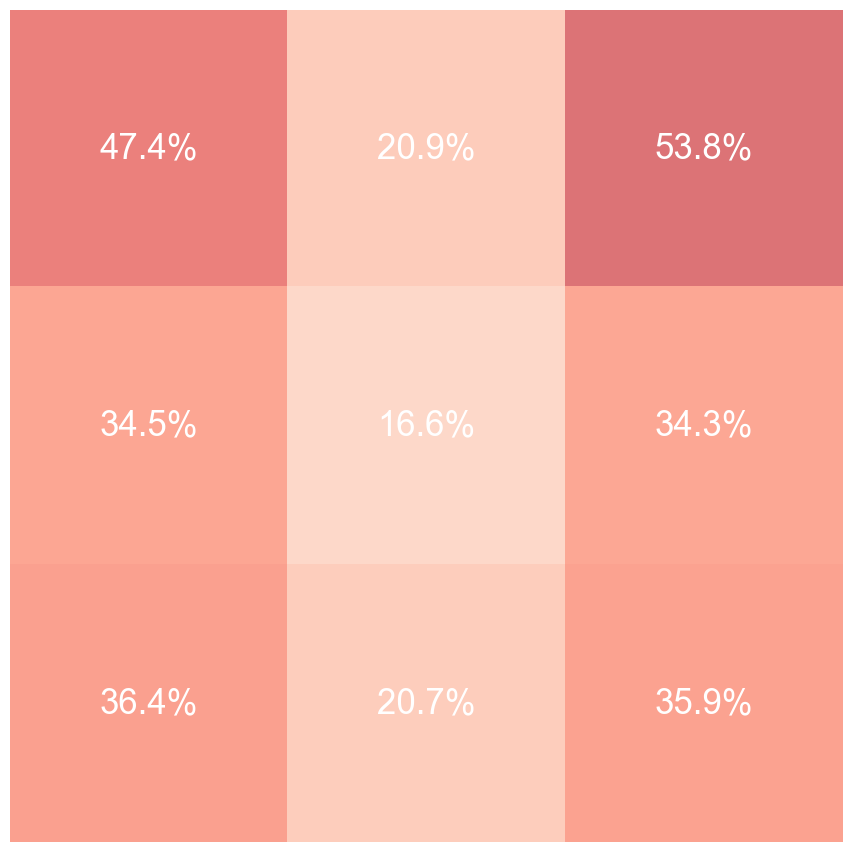

In [126]:
# Load the image of the goal
goal_image_path = 'img/goal.png'
goal_image = Image.open(goal_image_path)
goal_width, goal_height = goal_image.size

# Data
heatmap_data = np.array(allsvenskan).reshape(3, 3)

# Set up the figure size to match the aspect ratio of the goal image
fig, ax = plt.subplots(figsize=(goal_width/100, goal_height/100), dpi=100)

# Create the heatmap
cax = ax.imshow(heatmap_data, cmap='Reds', interpolation='nearest', alpha=0.6, vmin=0, vmax=70)  # Set the vmin and vmax to define the scale

# Annotate each cell with the numeric value using white text
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        ax.text(j, i, '{:.1f}%'.format(heatmap_data[i, j]), ha='center', va='center', color='w', size = 25)

# Turn off the axes
ax.axis('off')

# Save the heatmap to a temporary buffer
heatmap_buffer = io.BytesIO()
plt.savefig(heatmap_buffer, format='png', transparent=True)
heatmap_buffer.seek(0)

# Load this heatmap into PIL
heatmap_image = Image.open(heatmap_buffer)

# Resize heatmap to match the specified size
heatmap_image = heatmap_image.resize((3123, 681), Image.LANCZOS)

# Define the position where you want to paste the heatmap on the goal image
heatmap_position = (-652, 202) 

# Overlay the heatmap on the goal image
goal_with_heatmap = goal_image.copy()
goal_with_heatmap.paste(heatmap_image, heatmap_position, heatmap_image.split()[3])  # Use the alpha channel as the mask

# Save or display the combined image
goal_with_heatmap_path = 'img/allsvenskan_heatmap.png'
goal_with_heatmap.save(goal_with_heatmap_path)
goal_with_heatmap.show()


### Shots

In [127]:
next_action = damallsvenskan_all_df['action'].shift(-1)

shot_to_goal = (damallsvenskan_all_df['action'] == 'Shot') & (next_action == 'Goal')
x_goal_coordinates_damallsvenskan = damallsvenskan_all_df.loc[shot_to_goal, 'xpos'].tolist()
y_goal_coordinates_damallsvenskan = damallsvenskan_all_df.loc[shot_to_goal, 'ypos'].tolist()

shot_to_miss = (damallsvenskan_all_df['action'] == 'Shot') & (next_action != 'Goal')
x_shot_coordinates_damallsvenskan = damallsvenskan_all_df.loc[shot_to_miss, 'xpos'].tolist()
y_shot_coordinates_damallsvenskan = damallsvenskan_all_df.loc[shot_to_miss, 'ypos'].tolist()

# Scale the x coordinates
x_shot_coordinates_damallsvenskan_scaled = [x * 120 / 100 for x in x_shot_coordinates_damallsvenskan]
x_goal_coordinates_damallsvenskan_scaled = [x * 120 / 100 for x in x_goal_coordinates_damallsvenskan]

# Scale the y coordinates
y_shot_coordinates_damallsvenskan_scaled = [y * 80 / 100 for y in y_shot_coordinates_damallsvenskan]
y_goal_coordinates_damallsvenskan_scaled = [y * 80 / 100 for y in y_goal_coordinates_damallsvenskan]

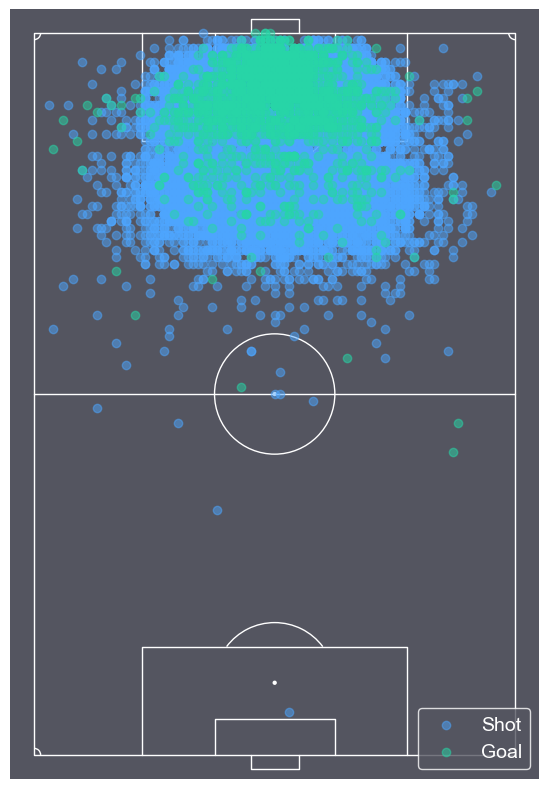

In [128]:
pitch = VerticalPitch(half=False, goal_type='box', corner_arcs=True, pitch_color='#545560', line_color='white', linewidth=1)

fig, ax = pitch.draw(figsize=(8,8))

sc = pitch.scatter(x_shot_coordinates_damallsvenskan_scaled, y_shot_coordinates_damallsvenskan_scaled, 
                   ax=ax, color='#4da6ff', alpha=0.5, label='Shot')
sc = pitch.scatter(x_goal_coordinates_damallsvenskan_scaled, y_goal_coordinates_damallsvenskan_scaled, 
                   ax=ax, color='#27d6a7', alpha=0.5, label='Goal')

# Create a legend and set the facecolor, edgecolor, and fontsize
legend = ax.legend(loc='lower right', facecolor='#545560', edgecolor='white', fontsize=14)

# Set the color of the legend text to white
for text in legend.get_texts():
    text.set_color('white')

In [129]:
next_action = allsvenskan_all_df['action'].shift(-1)

shot_to_goal = (allsvenskan_all_df['action'] == 'Shot') & (next_action == 'Goal')
x_goal_coordinates_allsvenskan = allsvenskan_all_df.loc[shot_to_goal, 'xpos'].tolist()
y_goal_coordinates_allsvenskan = allsvenskan_all_df.loc[shot_to_goal, 'ypos'].tolist()

shot_to_miss = (allsvenskan_all_df['action'] == 'Shot') & (next_action != 'Goal')
x_shot_coordinates_allsvenskan = allsvenskan_all_df.loc[shot_to_miss, 'xpos'].tolist()
y_shot_coordinates_allsvenskan = allsvenskan_all_df.loc[shot_to_miss, 'ypos'].tolist()

# Scale the x coordinates
x_shot_coordinates_allsvenskan_scaled = [x * 120 / 100 for x in x_shot_coordinates_allsvenskan]
x_goal_coordinates_allsvenskan_scaled = [x * 120 / 100 for x in x_goal_coordinates_allsvenskan]

# Scale the y coordinates
y_shot_coordinates_allsvenskan_scaled = [y * 80 / 100 for y in y_shot_coordinates_allsvenskan]
y_goal_coordinates_allsvenskan_scaled = [y * 80 / 100 for y in y_goal_coordinates_allsvenskan]

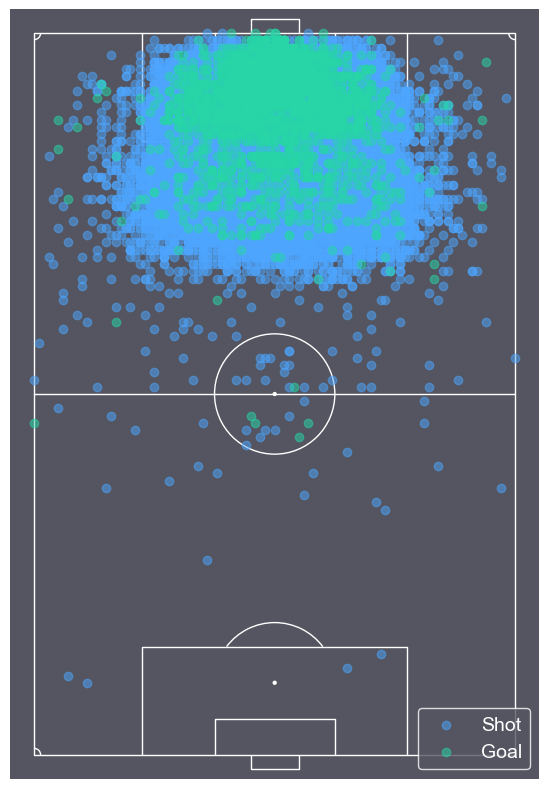

In [130]:
pitch = VerticalPitch(half=False, goal_type='box', corner_arcs=True, pitch_color='#545560', line_color='white', linewidth=1)

fig, ax = pitch.draw(figsize=(8,8))

sc = pitch.scatter(x_shot_coordinates_allsvenskan_scaled, y_shot_coordinates_allsvenskan_scaled, 
                   ax=ax, color='#4da6ff', alpha=0.5, label='Shot')
sc = pitch.scatter(x_goal_coordinates_allsvenskan_scaled, y_goal_coordinates_allsvenskan_scaled, 
                   ax=ax, color='#27d6a7', alpha=0.5, label='Goal')

# Create a legend and set the facecolor, edgecolor, and fontsize
legend = ax.legend(loc='lower right', facecolor='#545560', edgecolor='white', fontsize=14)

# Set the color of the legend text to white
for text in legend.get_texts():
    text.set_color('white')

### Shot efficiency

In [131]:
# Count all the occurences of the action wide shot in damallsvenskan and allsvenskan
wide_shot_count_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Wide shot'].shape[0]
wide_shot_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Wide shot'].shape[0]

# Count the total of shots
shot_count_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Shot'].shape[0]
shot_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Shot'].shape[0]

# Percentage of shots on target
percentage_shots_on_target_damallsvenskan = (shot_count_damallsvenskan - wide_shot_count_damallsvenskan) / shot_count_damallsvenskan * 100
percentage_shots_on_target_allsvenskan = (shot_count_allsvenskan - wide_shot_count_allsvenskan) / shot_count_allsvenskan * 100

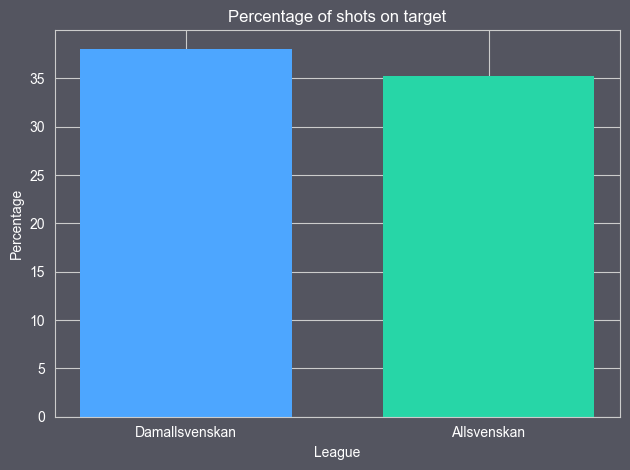

In [132]:
# Bar plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], percentage_shots_on_target_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], percentage_shots_on_target_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Percentage', color='white')  # Set the text color for the y-axis label to white
plt.title('Percentage of shots on target', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()

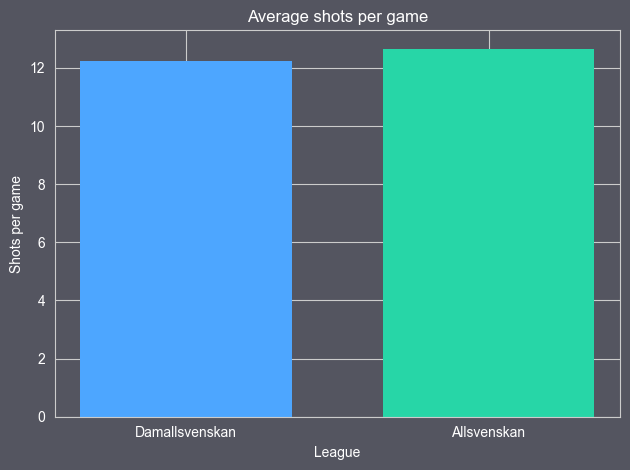

In [133]:
# Plot the amount of shots on average per game 
shots_per_game_damallsvenskan = shot_count_damallsvenskan / damallsvenskan_factor
shots_per_game_allsvenskan = shot_count_allsvenskan / allsvenskan_factor

# Bar plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], shots_per_game_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], shots_per_game_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Shots per game', color='white')  # Set the text color for the y-axis label to white
plt.title('Average shots per game', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()

## Tackles

### Amount of tackles

In [134]:
# TODO: Code

In [135]:
# TODO: Graph

### Amount of headers that are shots

In [136]:
damallsvenskan_all_df['header'] = damallsvenskan_all_df['header'].astype(bool)
is_first_header_damallsvenskan = (damallsvenskan_all_df['header'] & ~damallsvenskan_all_df['header'].shift(1).fillna(False))
filtered_df_damallsvenskan = damallsvenskan_all_df[is_first_header_damallsvenskan | ~damallsvenskan_all_df['header']]
first_headers_df_damallsvenskan = damallsvenskan_all_df[is_first_header_damallsvenskan]

allsvenskan_all_df['header'] = allsvenskan_all_df['header'].astype(bool)
is_first_header_allsvenskan = (allsvenskan_all_df['header'] & ~allsvenskan_all_df['header'].shift(1).fillna(False))
filtered_df_allsvenskan = allsvenskan_all_df[is_first_header_allsvenskan | ~allsvenskan_all_df['header']]
first_headers_df_allsvenskan = allsvenskan_all_df[is_first_header_allsvenskan]

# Count the number of headers for each team
headers_count_damallsvenskan = first_headers_df_damallsvenskan.shape[0]
headers_count_allsvenskan = first_headers_df_allsvenskan.shape[0]

# Count the number of shots for each league
shots_count_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Shot'].shape[0]
shots_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Shot'].shape[0]

/var/folders/yn/w3h701111q199y7qdtvn61940000gn/T/ipykernel_69984/144630925.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_first_header_damallsvenskan = (damallsvenskan_all_df['header'] & ~damallsvenskan_all_df['header'].shift(1).fillna(False))
/var/folders/yn/w3h701111q199y7qdtvn61940000gn/T/ipykernel_69984/144630925.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_first_header_allsvenskan = (allsvenskan_all_df['header'] & ~allsvenskan_all_df['header'].shift(1).fillna(False))


In [137]:
percentage_header_damallsvenskan = headers_count_damallsvenskan / shots_count_damallsvenskan * 100
percentage_header_allsvenskan = headers_count_allsvenskan / shots_count_allsvenskan * 100

header_per_game_damallsvenskan = headers_count_damallsvenskan / damallsvenskan_factor
header_per_game_allsvenskan = headers_count_allsvenskan / allsvenskan_factor

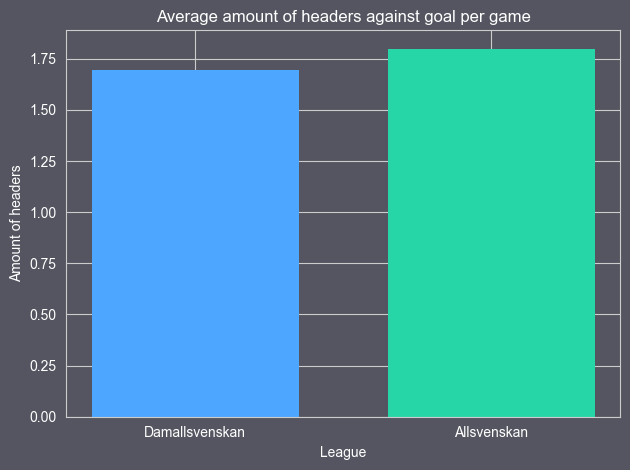

In [138]:
# Plot the amount of headers per average game for each league
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], header_per_game_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], header_per_game_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Amount of headers', color='white')  # Set the text color for the y-axis label to white
plt.title('Average amount of headers against goal per game', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()

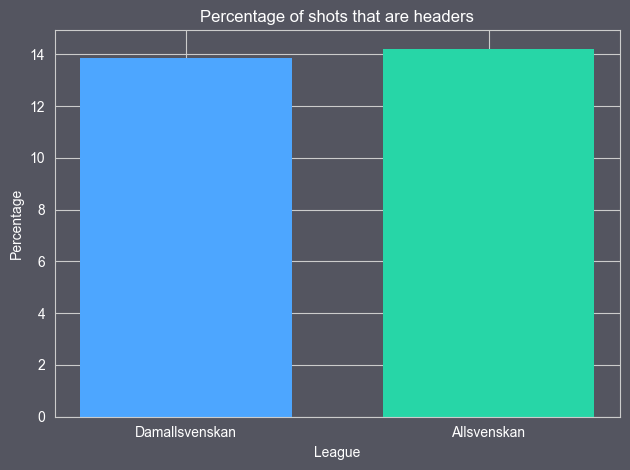

In [139]:
# Plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], percentage_header_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], percentage_header_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Percentage', color='white')  # Set the text color for the y-axis label to white
plt.title('Percentage of shots that are headers', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()

### Scatter plot headers

In [141]:
# Take out the x and y coordinates for the headers
x_header_coordinates_damallsvenskan = first_headers_df_damallsvenskan['xpos'].tolist()
y_header_coordinates_damallsvenskan = first_headers_df_damallsvenskan['ypos'].tolist()

# Scale the coordinates
x_header_coordinates_damallsvenskan_scaled = [x * 120 / 100 for x in x_header_coordinates_damallsvenskan]
y_header_coordinates_damallsvenskan_scaled = [y * 80 / 100 for y in y_header_coordinates_damallsvenskan]

# Take out the x and y coordinates for the headers
x_header_coordinates_allsvenskan = first_headers_df_allsvenskan['xpos'].tolist()
y_header_coordinates_allsvenskan = first_headers_df_allsvenskan['ypos'].tolist()

# Scale the coordinates
x_header_coordinates_allsvenskan_scaled = [x * 120 / 100 for x in x_header_coordinates_allsvenskan]
y_header_coordinates_allsvenskan_scaled = [y * 80 / 100 for y in y_header_coordinates_allsvenskan]

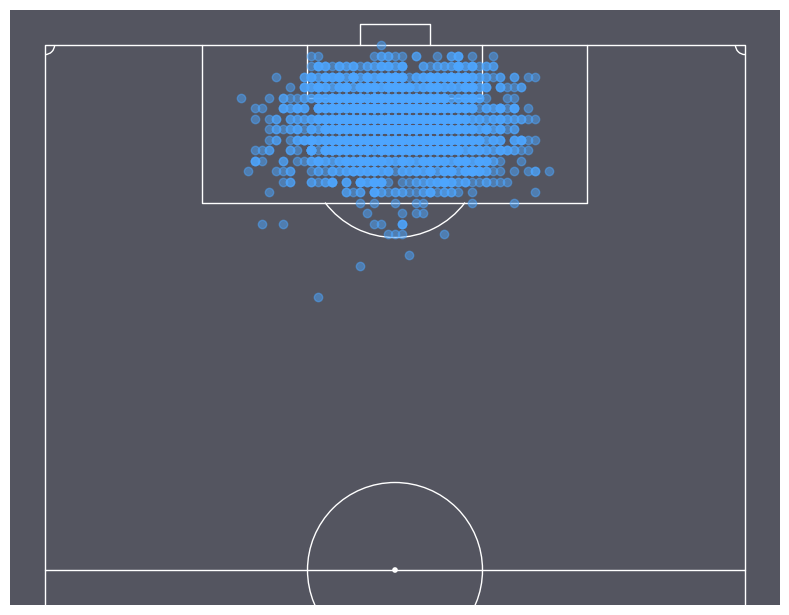

In [142]:
# Plot Damallsvenskan
pitch = VerticalPitch(half=True, goal_type='box', corner_arcs=True, pitch_color='#545560', line_color='white', linewidth=1)

fig, ax = pitch.draw(figsize=(8,8))

sc = pitch.scatter(x_header_coordinates_damallsvenskan_scaled, y_header_coordinates_damallsvenskan_scaled,
                     ax=ax, color='#4da6ff', alpha=0.5, label='Header')

# Set the color of the legend text to white
for text in legend.get_texts():
    text.set_color('white')

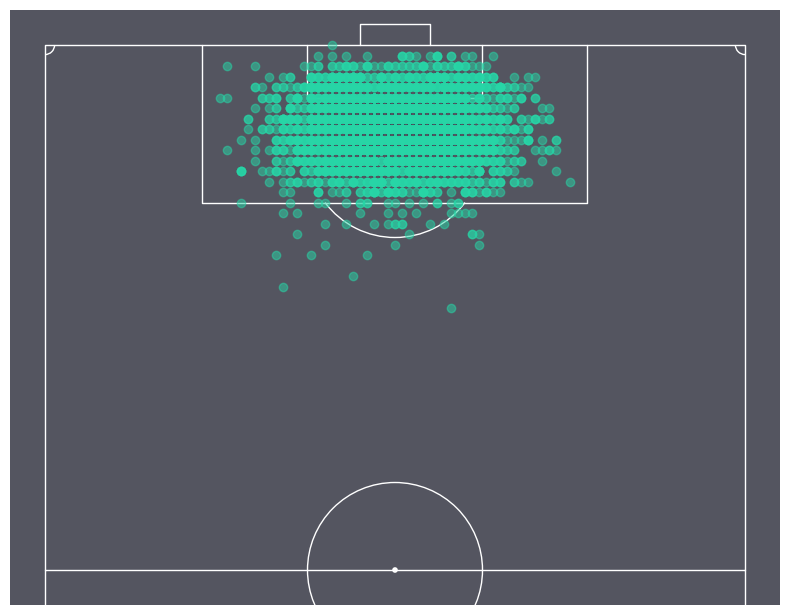

In [143]:
# Plot Allsvenskan
pitch = VerticalPitch(half=True, goal_type='box', corner_arcs=True, pitch_color='#545560', line_color='white', linewidth=1)

fig, ax = pitch.draw(figsize=(8,8))

sc = pitch.scatter(x_header_coordinates_allsvenskan_scaled, y_header_coordinates_allsvenskan_scaled,
                     ax=ax, color='#27d6a7', alpha=0.5, label='Header')

# Set the color of the legend text to white
for text in legend.get_texts():
    text.set_color('white')

### Amount of fouls

In [ ]:
fouls_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Foul'].shape[0]
fouls_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Foul'].shape[0]

fouls_damallsvenskan = fouls_damallsvenskan / damallsvenskan_factor
fouls_allsvenskan = fouls_allsvenskan / allsvenskan_factor

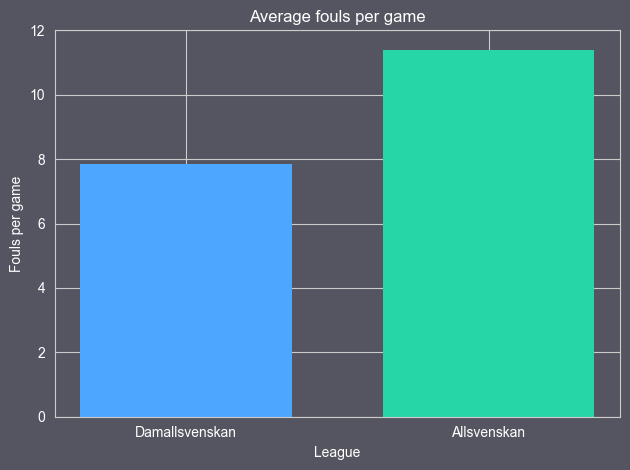

In [ ]:
# Plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], fouls_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], fouls_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Fouls per game', color='white')  # Set the text color for the y-axis label to white
plt.title('Average fouls per game', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks((0,2,4,6,8,10,12), color='white')  # Set the text color for the x-axis ticks to white
plt.tight_layout()
plt.show()

### Amount of cards

In [ ]:
yellow_cards_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Yellow card'].shape[0]
red_cards_damallsvenskan = damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Red card'].shape[0]

yellow_cards_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Yellow card'].shape[0]
red_cards_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Red card'].shape[0]

yellow_cards_damallsvenskan = yellow_cards_damallsvenskan / damallsvenskan_factor
red_cards_damallsvenskan = red_cards_damallsvenskan / damallsvenskan_factor
yellow_cards_allsvenskan = yellow_cards_allsvenskan / allsvenskan_factor
red_cards_allsvenskan = red_cards_allsvenskan / allsvenskan_factor

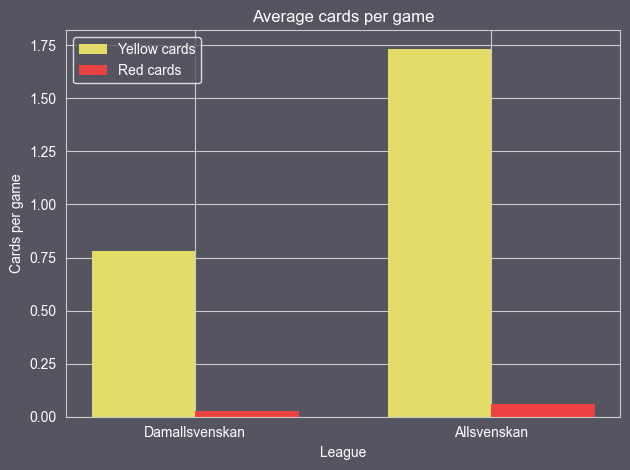

In [ ]:
# Plot four bars im total, two for each league
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.arange(2)
bar_width = 0.35
opacity = 1

rects1 = plt.bar(index[0], yellow_cards_damallsvenskan, bar_width,
                alpha=opacity,
                color='#e3dd68',
                label='Yellow cards',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[0] + bar_width, red_cards_damallsvenskan, bar_width,
                alpha=opacity,
                color='#ed4242',
                label='Red cards',
                edgecolor='none')  # Add edgecolor to the bar

rects3 = plt.bar(index[1], yellow_cards_allsvenskan, bar_width,
                alpha=opacity,
                color='#e3dd68',
                edgecolor='none')  # Add edgecolor to the bar

rects4 = plt.bar(index[1] + bar_width, red_cards_allsvenskan, bar_width,
                alpha=opacity,
                color='#ed4242',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')

plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Cards per game', color='white')  # Set the text color for the y-axis label to white
plt.title('Average cards per game', color='white')  # Set the text color for the title to white
plt.xticks(index + bar_width/2, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the x-axis ticks to white
legend = plt.legend(loc='upper left', facecolor='#545560', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')  # Set the legend text color to white
plt.tight_layout()
plt.show()


### Card conversion rate

In [ ]:
# How many fouls lead to a card
percentage_cards_damallsvenskan = (yellow_cards_damallsvenskan + red_cards_damallsvenskan) / fouls_damallsvenskan * 100
percentage_cards_allsvenskan = (yellow_cards_allsvenskan + red_cards_allsvenskan) / fouls_allsvenskan * 100

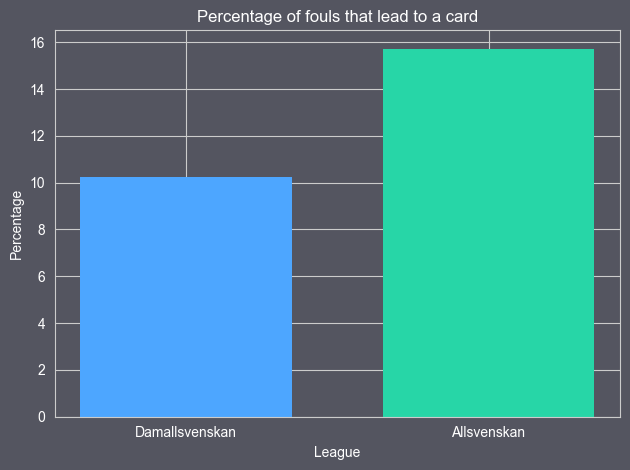

In [ ]:
# Plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(facecolor='#545560')  # Set the background color of the figure to gray
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], percentage_cards_damallsvenskan, bar_width,
                alpha=opacity,
                color='#4da6ff',
                label='Damallsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

rects2 = plt.bar(index[1], percentage_cards_allsvenskan, bar_width,
                alpha=opacity,
                color='#27d6a7',
                label='Allsvenskan',
                edgecolor='none')  # Add edgecolor to the bar

# Set the background color of the plot area to gray
ax.set_facecolor('#545560')
plt.xlabel('League', color='white')  # Set the text color for the x-axis label to white
plt.ylabel('Percentage', color='white')  # Set the text color for the y-axis label to white
plt.title('Percentage of fouls that lead to a card', color='white')  # Set the text color for the title to white
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'), color='white')  # Set the text color for the x-axis ticks to white
plt.yticks(color='white')  # Set the text color for the y-axis ticks to white
plt.tight_layout()
plt.show()